In [1]:
import torch
import torchvision
from project1_model_2 import project1_model_2
from project1_model_4 import project1_model_4
from torchsummary import summary
from torchtoolbox.transform import CIFAR10Policy, Cutout
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, ToTensor, Normalize
import matplotlib.pyplot as plt

In [2]:
model_4 = project1_model_4().cuda()
summary(model_4, input_size=[(3, 32, 32)])

model_2 = project1_model_2().cuda()
summary(model_2, input_size=[(3, 32, 32)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
            Conv2d-3           [-1, 32, 32, 32]           9,216
       BatchNorm2d-4           [-1, 32, 32, 32]              64
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
        BasicBlock-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 32, 32, 32]           9,216
       BatchNorm2d-9           [-1, 32, 32, 32]              64
           Conv2d-10           [-1, 32, 32, 32]           9,216
      BatchNorm2d-11           [-1, 32, 32, 32]              64
       BasicBlock-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           9,216
      BatchNorm2d-14           [-1, 32,

In [3]:
Epoch = 160
Batch_size = 128
Loss = torch.nn.CrossEntropyLoss()
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=3e-4)
optimizer_4 = torch.optim.Adam(model_4.parameters(), lr=3e-4)

In [4]:
transform_train = Compose(
        [RandomCrop(32, padding=4), RandomHorizontalFlip(), ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
transform_test = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
trainingdata = torchvision.datasets.CIFAR10('./CIFAR10/', train=True, download=True, transform=transform_train)
testdata = torchvision.datasets.CIFAR10('./CIFAR10/', train=False, download=True, transform=transform_test)



Files already downloaded and verified
Files already downloaded and verified


In [5]:
trainDataLoader_2 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_2 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_2 = []
test_loss_history_2 = []
test_acc_history_2 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_2):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_2.zero_grad()
        predicted_output = model_2(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_2.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_2):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_2(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_2)
    test_loss = test_loss / len(testDataLoader_2)
    test_acc = test_acc / test_total

    train_loss_history_2.append(train_loss)
    test_loss_history_2.append(test_loss)
    test_acc_history_2.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.5658376844947601, Test loss 1.3153346414807476, Test acc 0.5224
Epoch 1, Train loss 1.087476822421374, Test loss 1.0158210155330127, Test acc 0.6431
Epoch 2, Train loss 0.8712003099948854, Test loss 0.8660463343692731, Test acc 0.6994
Epoch 3, Train loss 0.7320979694881098, Test loss 0.7766599255272105, Test acc 0.7341
Epoch 4, Train loss 0.6363897488245269, Test loss 0.6756355256973943, Test acc 0.7646
Epoch 5, Train loss 0.5700619320582856, Test loss 0.6466706806345831, Test acc 0.7771
Epoch 6, Train loss 0.5130413163196096, Test loss 0.60546169062204, Test acc 0.7961
Epoch 7, Train loss 0.4745377149728253, Test loss 0.5855403931080541, Test acc 0.8046
Epoch 8, Train loss 0.43449924341248125, Test loss 0.5300158937520618, Test acc 0.8208
Epoch 9, Train loss 0.40637519307758496, Test loss 0.5072941036918496, Test acc 0.8266
Epoch 10, Train loss 0.38374748315347734, Test loss 0.48713531977013697, Test acc 0.8365
Epoch 11, Train loss 0.3583007173236374, Test loss 0

Epoch 94, Train loss 0.027857307671590725, Test loss 0.512289243219774, Test acc 0.8984
Epoch 95, Train loss 0.03132596635646746, Test loss 0.4907294907901861, Test acc 0.9035
Epoch 96, Train loss 0.029925027653775024, Test loss 0.5207962927561772, Test acc 0.8948
Epoch 97, Train loss 0.026299068136313393, Test loss 0.5226058664767048, Test acc 0.8954
Epoch 98, Train loss 0.031358169224422874, Test loss 0.4951517843181574, Test acc 0.8971
Epoch 99, Train loss 0.025902212592368218, Test loss 0.4871824991099442, Test acc 0.8995
Epoch 100, Train loss 0.026687260100837138, Test loss 0.49521787200547474, Test acc 0.8996
Epoch 101, Train loss 0.029488937608907213, Test loss 0.4954661734496491, Test acc 0.8972
Epoch 102, Train loss 0.028386351979805675, Test loss 0.5046636714965482, Test acc 0.897
Epoch 103, Train loss 0.027655451903905708, Test loss 0.5112145418607736, Test acc 0.8907
Epoch 104, Train loss 0.023686458893052403, Test loss 0.5074077842733528, Test acc 0.8986
Epoch 105, Train l

In [6]:
trainDataLoader_4 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_4 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_4 = []
test_loss_history_4 = []
test_acc_history_4 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_4):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_4.zero_grad()
        predicted_output = model_4(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_4.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_4):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_4(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_4)
    test_loss = test_loss / len(testDataLoader_4)
    test_acc = test_acc / test_total

    train_loss_history_4.append(train_loss)
    test_loss_history_4.append(test_loss)
    test_acc_history_4.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.5444544517170742, Test loss 1.197801921941057, Test acc 0.5661
Epoch 1, Train loss 1.0597201113200858, Test loss 0.9323620471773268, Test acc 0.6681
Epoch 2, Train loss 0.8243351833289846, Test loss 0.761284615420088, Test acc 0.736
Epoch 3, Train loss 0.6887678928539881, Test loss 0.6422346792643583, Test acc 0.7814
Epoch 4, Train loss 0.6044110097848546, Test loss 0.5860312532020521, Test acc 0.7938
Epoch 5, Train loss 0.5446602788270282, Test loss 0.5940413350545908, Test acc 0.797
Epoch 6, Train loss 0.49699448723622297, Test loss 0.5345318958729128, Test acc 0.8173
Epoch 7, Train loss 0.45614550226484724, Test loss 0.5055136831500863, Test acc 0.8259
Epoch 8, Train loss 0.4248267861126024, Test loss 0.5093573699646359, Test acc 0.8291
Epoch 9, Train loss 0.3937329501294724, Test loss 0.4660398318797727, Test acc 0.8427
Epoch 10, Train loss 0.37079657370324637, Test loss 0.45667312454573716, Test acc 0.849
Epoch 11, Train loss 0.3440806329097894, Test loss 0.4

Epoch 94, Train loss 0.028657191178447013, Test loss 0.43577859512990036, Test acc 0.904
Epoch 95, Train loss 0.029045197288886836, Test loss 0.4508790022964719, Test acc 0.9025
Epoch 96, Train loss 0.030057513795476262, Test loss 0.501669505728951, Test acc 0.8978
Epoch 97, Train loss 0.030018228907709766, Test loss 0.4780731874553463, Test acc 0.903
Epoch 98, Train loss 0.026308597640737015, Test loss 0.4680823770504964, Test acc 0.9025
Epoch 99, Train loss 0.030471188040948033, Test loss 0.45358135824716544, Test acc 0.9031
Epoch 100, Train loss 0.02318936146383681, Test loss 0.5022945217316663, Test acc 0.9001
Epoch 101, Train loss 0.03087128540146691, Test loss 0.43325586767890784, Test acc 0.9104
Epoch 102, Train loss 0.024921128762138013, Test loss 0.48553841061229946, Test acc 0.9012
Epoch 103, Train loss 0.02623088340185073, Test loss 0.4821177321144297, Test acc 0.9041
Epoch 104, Train loss 0.02540659501045809, Test loss 0.48992457042766524, Test acc 0.9037
Epoch 105, Train l

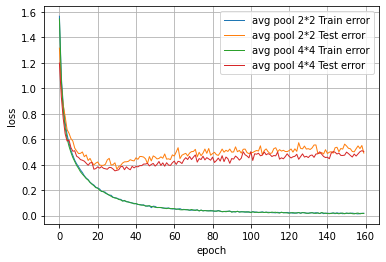

In [7]:
plt.plot(range(Epoch), train_loss_history_2, '-', linewidth=1, label='avg pool 2*2 Train error')
plt.plot(range(Epoch), test_loss_history_2, '-', linewidth=1, label='avg pool 2*2 Test error')
plt.plot(range(Epoch), train_loss_history_4, '-', linewidth=1, label='avg pool 4*4 Train error')
plt.plot(range(Epoch), test_loss_history_4, '-', linewidth=1, label='avg pool 4*4 Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

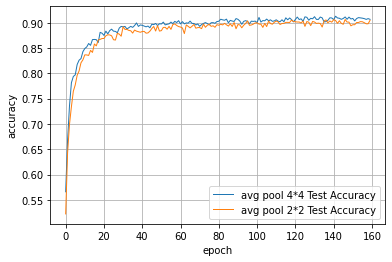

In [8]:
plt.plot(range(Epoch), test_acc_history_4, '-', linewidth=1, label='avg pool 4*4 Test Accuracy')
plt.plot(range(Epoch), test_acc_history_2, '-', linewidth=1, label='avg pool 2*2 Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [9]:
print('Best Test acc for avg pool 2*2: %s' % (max(test_acc_history_2)))
print('Best Test acc for avg pool 4*4: %s' % (max(test_acc_history_4)))

Best Test acc for avg pool 2*2: 0.9063
Best Test acc for avg pool 4*4: 0.9127


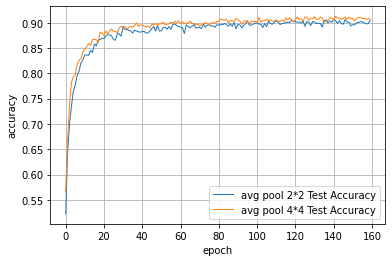

In [10]:
plt.plot(range(Epoch), test_acc_history_2, '-', linewidth=1, label='avg pool 2*2 Test Accuracy')
plt.plot(range(Epoch), test_acc_history_4, '-', linewidth=1, label='avg pool 4*4 Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()